# Model Evaluation

## Model Details

In [12]:
import pandas as pd

import pandas as pd

model_details = {
    "Model Name": ["BERT-Base-Raw", "BERT-Base-Cleaned", "BERT-Base-Generalized", "BERT-Large-Raw"],
    "Parameters (M)": [110, 110, 110, 340],
    "File Size (MB)": [438, 438, 438, 1340],
    "Processing": ["Raw", "Cleaned", "Generalized", "Raw"],
    "Epoch": [5, 5, 5, 5],
    "Batch Size": [64, 64, 64, 64],
    "Best Epoch At": [3, 2, 1, 2],
    "Learning Rate": [2e-5, 2e-5, 2e-5, 2e-5],
    "Optimizer": ["AdamW", "AdamW", "AdamW", "AdamW"],
}

# Create DataFrame and display as a styled table
df_models = pd.DataFrame(model_details)
display(df_models.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_caption("Model Architecture Details"))

,Model Name,Parameters (M),File Size (MB),Processing,Epoch,Batch Size,Best Epoch At,Learning Rate,Optimizer
0,BERT-Base-Raw,110,438,Raw,5,64,3,0.000020,AdamW
1,BERT-Base-Cleaned,110,438,Cleaned,5,64,2,0.000020,AdamW
2,BERT-Base-Generalized,110,438,Generalized,5,64,1,0.000020,AdamW
3,BERT-Large-Raw,340,1340,Raw,5,64,2,0.000020,AdamW


## Model Performance Summary

In [ ]:
df = pd.read_csv('../artifact/consolidated_performance_summary.csv')
display(df.style.highlight_max(axis=0, subset = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']))

,Model_Name,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,bert-base-clean-climate-sentiment-wqf7007,climate_data_clean,0.706400,0.701600,0.706400,0.703000,0.769800
1,bert-base-generalized-climate-sentiment-wqf7007,climate_data_generalized,0.710600,0.727400,0.710600,0.713200,0.792800
2,bert-base-raw-climate-sentiment-wqf7007,climate_data_raw,0.788600,0.784700,0.788600,0.785300,0.830700
3,bert-large-raw-climate-sentiment-wqf7007,climate_data_raw,0.797000,0.792300,0.797000,0.791100,0.824500


Note that the `AUC-ROC` shows the mean of per-class AUC-ROC scores, it is different from the AUC score shows in the plot below where it calculates based on micro-average AUC.

- Micro-averaging AUC: Micro-averaging aggregates the true positives (TP), false positives (FP), and false negatives (FN) across all classes before calculating the ROC curve and AUC. Essentially, it treats all predictions and true labels as a single, flattened binary prediction task, irrespective of the original class.

- Mean of Per-Class AUC Scores: This metric gives you an idea of how well your model distinguishes each class individually from all other classes. Each roc_auc_score calculation treats one class as the "positive" class and all other classes as the "negative" class in a one-vs-rest (OvR) fashion. The mean then averages these individual performance measures.

## Model AUC-ROC Curve

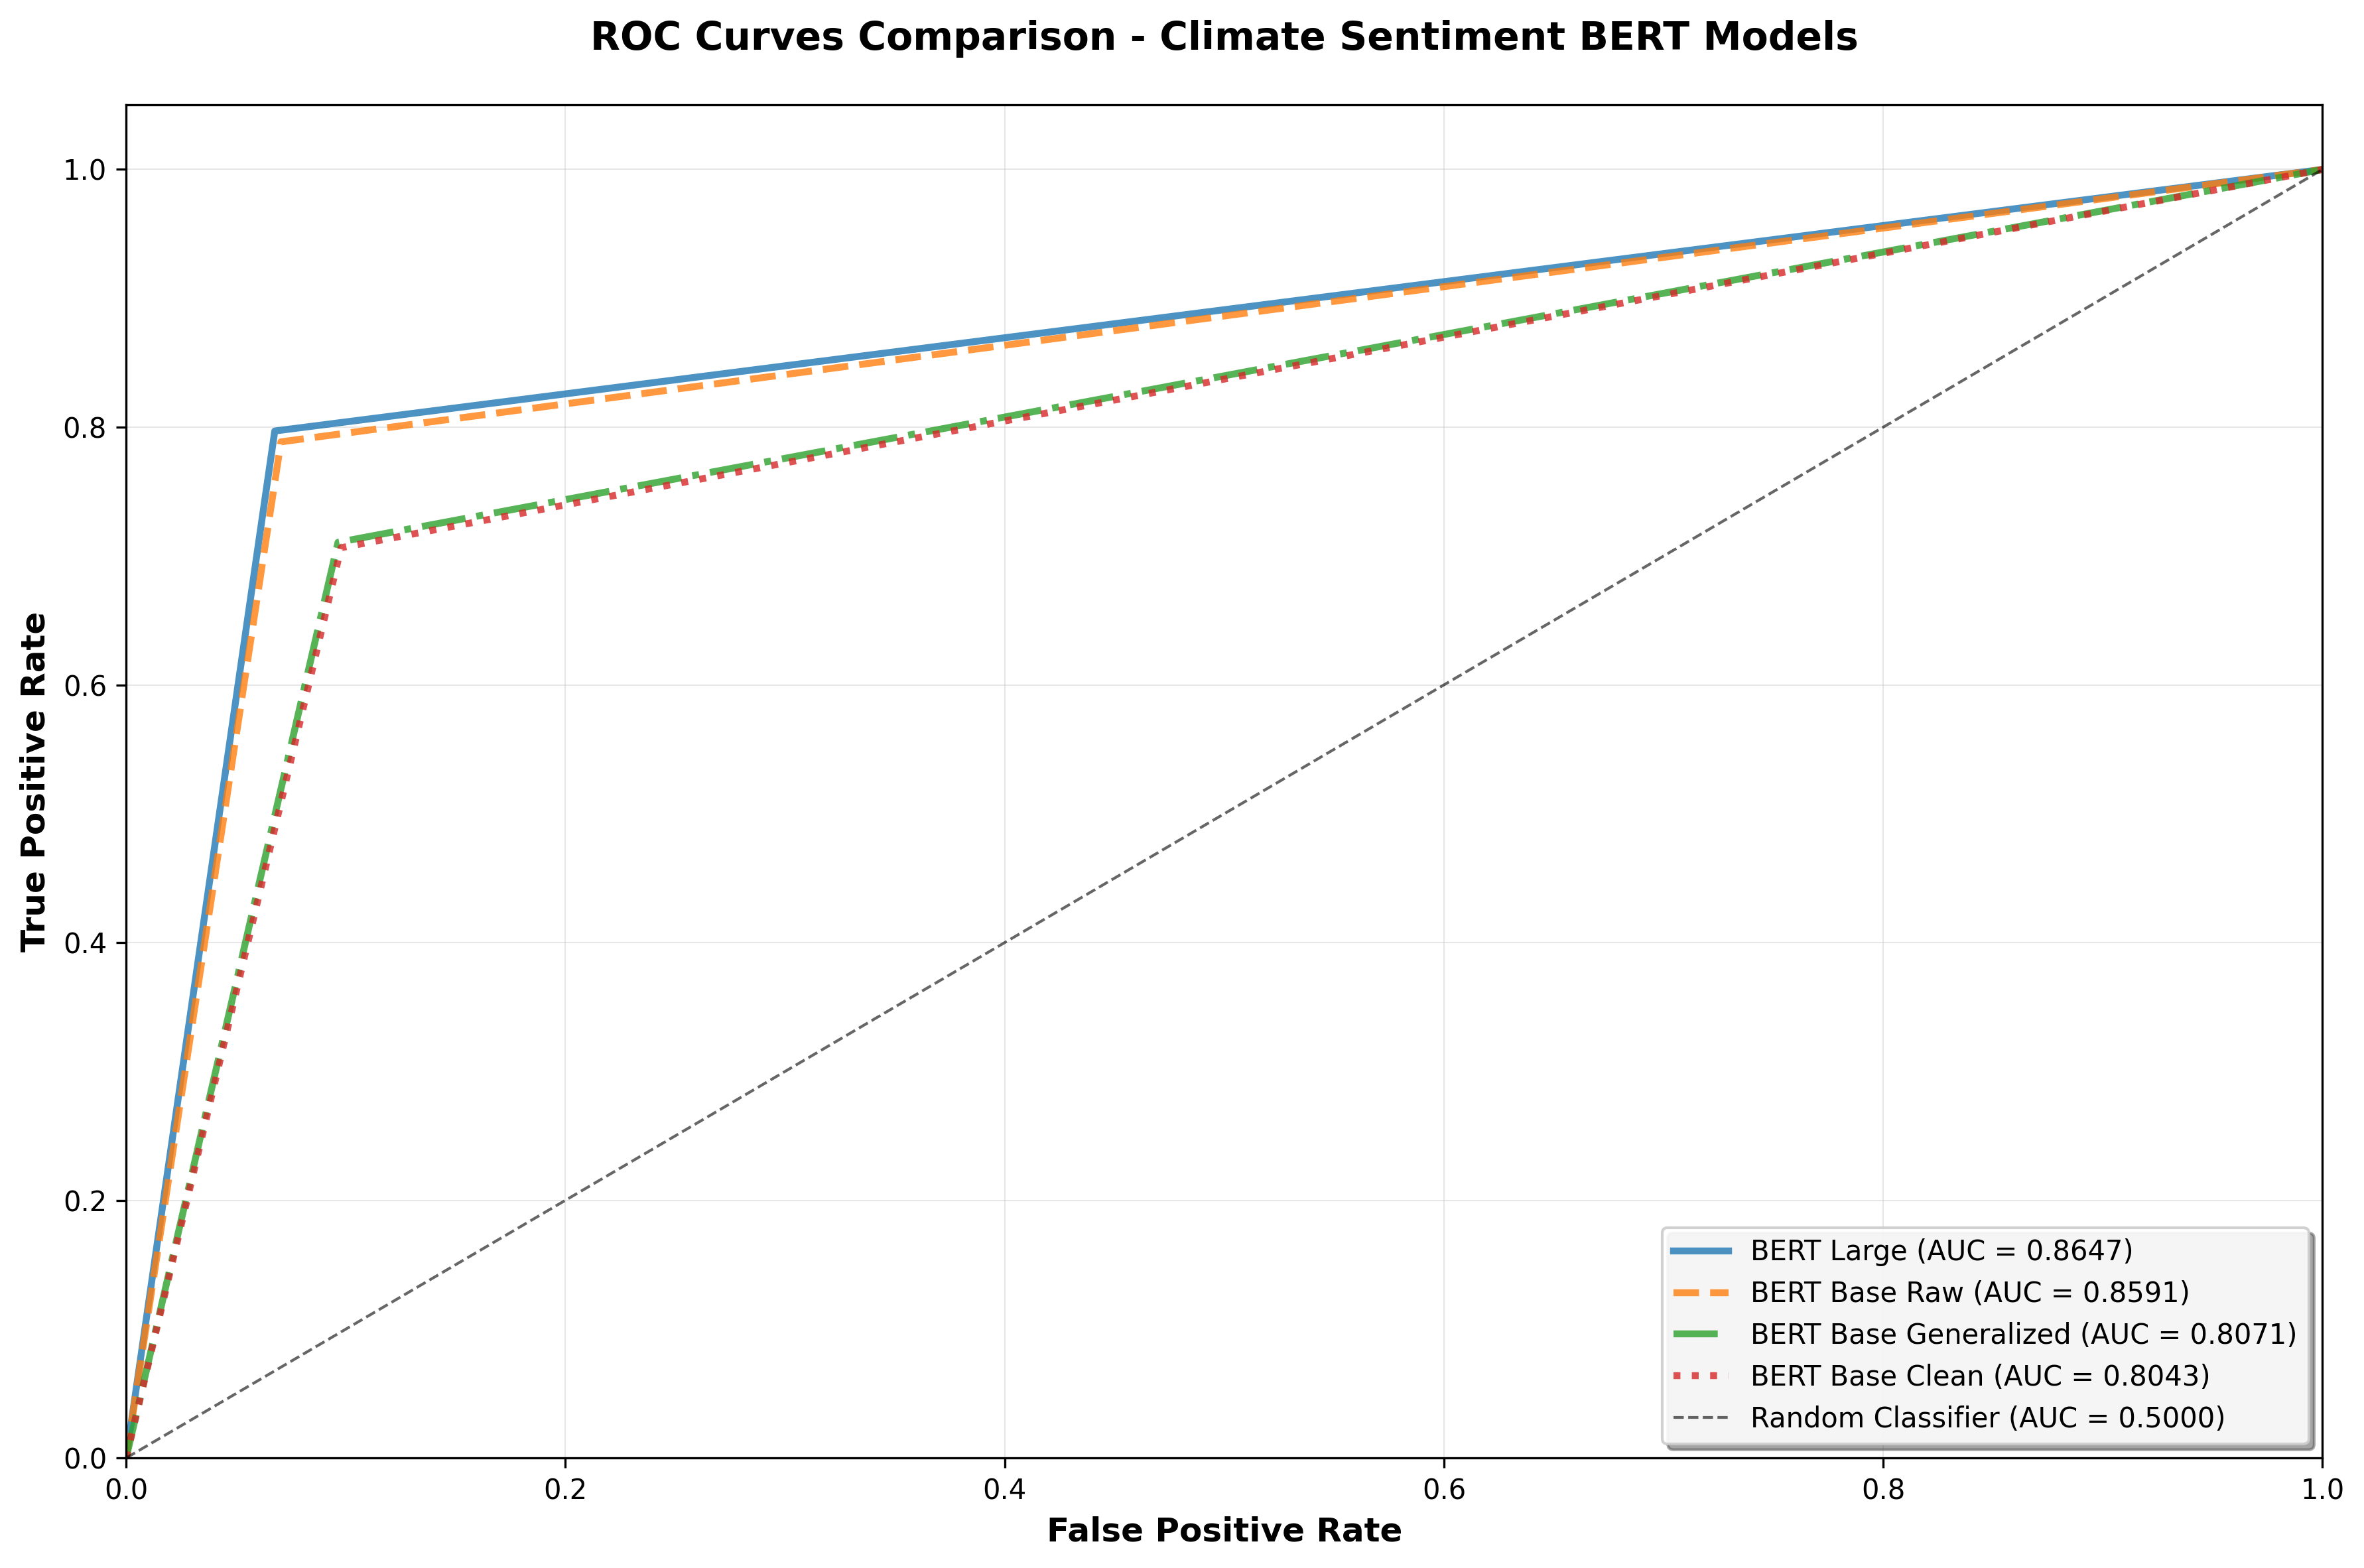

In [8]:
from IPython.display import Image, display

# Display the image directly from file path
display(Image('../artifact/consolidated_roc_comparison.png'))